# Data cleansing and descriptive Statistics
using Pandas, numpy, pyplot, Seaborn, etc.

In [1]:
# Import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import scipy.stats as stats

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Read the excel/csv file into a DataFrame
df_data = 'inputs/Data.csv'
df_clients_and_countries = 'inputs/Clients and countries.csv'

In [3]:
# Import data - Data
data_input = pd.read_csv(df_data)
data_input.head() #print the top 5 rows to preview the raw input

,customer_id,boxes_taken,activation_channel,state,score_count,score_freq,app_uses,app_store
0,1,65,F,C,55.0,0.0,25,app2
1,2,20,C,N,45.0,0.0,105,app2
2,3,80,A,N,60.0,0.0,35,app2
3,4,120,A,L,60.0,0.0,20,app2
4,5,45,C,L,50.0,0.0,45,app2


In [4]:
# Import data - Country
cl_ctry_input = pd.read_csv(df_clients_and_countries)

cl_ctry_input.head() #print the top 5 rows to preview the raw input

,country,customer_id
0,AU,1
1,AU,2
2,AU,3
3,AU,4
4,AU,5


## Task 1 - Merge Datasets

To merge the two datasets, we can use the merge function from pandas. However, before joining the datasets, we need to investigate the customer ID field from both datasets. It's important to have a good understanding whether the two datasets contain the same unique ID or not. Otherwise, there might be duplication or lost of information (depends on the join type) afer performing the merge task.

Assumption: left join is used to join the Clients and countries.csv to the Data.csv

In [5]:
# Investigate customer ID from both input files
print("Quick investigation on customer ID")
print(f"\t- Data.csv: {len(data_input.customer_id.unique())} unique customer IDs")
print(f"\t- Clients and countries.csv: {len(cl_ctry_input.customer_id.unique())} unique customer IDs.")

# Customer ID that in the Data.csv, but not in the Client and countries.csv
lst_1 = list(set(data_input.customer_id.unique()) - set(cl_ctry_input.customer_id.unique()))
# Customer ID that in the Clients and countries.csv, but not in the Data.csv
lst_2 = list(set(cl_ctry_input.customer_id.unique()) - set(data_input.customer_id.unique()))
print(f"\t- There are {len(lst_1)} customer IDs that are in the Data.csv, but not in the Clients and countries.csv ")
print(f"\t- There are {len(lst_2)} customer IDs that are in the Clients and countries.csv, but not in the Data.csv ")

Quick investigation on customer ID
	- Data.csv: 10020 unique customer IDs
	- Clients and countries.csv: 10020 unique customer IDs.
	- There are 0 customer IDs that are in the Data.csv, but not in the Clients and countries.csv 
	- There are 0 customer IDs that are in the Clients and countries.csv, but not in the Data.csv 


Summary: both input files contain the same customer IDs. Now we can proceed to merge the two datasets without risking duplications.

In [6]:
# Left join Clients and countries.csv to Data.csv
wrk_df = pd.merge(data_input, cl_ctry_input, how='left', on='customer_id', validate='one_to_one')

wrk_df.head() #print the top 5 rows to preview the dataset after merge

,customer_id,boxes_taken,activation_channel,state,score_count,score_freq,app_uses,app_store,country
0,1,65,F,C,55.0,0.0,25,app2,AU
1,2,20,C,N,45.0,0.0,105,app2,AU
2,3,80,A,N,60.0,0.0,35,app2,AU
3,4,120,A,L,60.0,0.0,20,app2,AU
4,5,45,C,L,50.0,0.0,45,app2,AU


# Data cleansing | improving readability
Assumption made regarding the mapping table

In [7]:
def renaming_aus_states(i):
    switcher={
        'W': 'WA',  
        'A': 'SA',  
        'T': 'NT',
        'N': 'NSW', 
        'L': 'QLD', 
        'S': 'TAS', 
        'C': 'VIC'  
    }
    return switcher.get(i,"To be investigated")

wrk_df['state'] = wrk_df['state'].apply(lambda x: renaming_aus_states(x))

In [8]:
wrk_df.tail(5)

,customer_id,boxes_taken,activation_channel,state,score_count,score_freq,app_uses,app_store,country
10015,10016,115,D,NSW,92.0,0.0,0,app3,NZ
10016,10017,51,D,QLD,66.0,0.0,0,app3,NZ
10017,10018,17,D,QLD,54.0,0.0,0,app3,NZ
10018,10019,33,D,QLD,59.0,0.0,0,app3,NZ
10019,10020,80,D,QLD,63.0,0.0,0,app3,NZ


## Task 2 - Summary Statistics

Because we are interested in the Australia related record, we need to firstly subset the merged dataset and only keep the rows that are related to Australia.

Secondly, we need to investigate any missing values or outliers that exist in the dataset and treat them accordingly.

Finally, for summary statistics, if it is numerical variable, we are more interested in measures such as min., max., variance, etc., and if it is categorical variavle, we would be more interest in how many different classes and the frequency.

In [9]:
# List of numerical variables
num_var = ['boxes_taken', 'score_count', 'score_freq', 'app_uses']
# List of categorical variables
cat_var = ['activation_channel', 'state', 'app_store', 'country']

In [10]:
# No. cusomter from each country
print(wrk_df.country.value_counts())

AU    9988
NZ      23
FR       3
GB       2
BE       1
CZ       1
US       1
DE       1
Name: country, dtype: int64


In [11]:
# Subset AU related records
au_df = wrk_df[wrk_df.country == 'AU'].copy().reset_index(drop=True)

# Check missing value and data types
au_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9988 entries, 0 to 9987
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         9988 non-null   int64  
 1   boxes_taken         9988 non-null   int64  
 2   activation_channel  9911 non-null   object 
 3   state               9988 non-null   object 
 4   score_count         9980 non-null   float64
 5   score_freq          9988 non-null   float64
 6   app_uses            9988 non-null   int64  
 7   app_store           8568 non-null   object 
 8   country             9988 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 702.4+ KB


There are missing values in 'activation_channel', 'state', 'score_count' and 'app_store'. There are various methods can be used to deal with missing values. For example, using mean or median. However, for the simplicity of this test, all rows that have missing values are removed.

In [12]:
# Remove missing values
au_df.dropna(inplace=True)

au_df.info()
## Lost about 15% of the sample.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8498 entries, 0 to 9987
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         8498 non-null   int64  
 1   boxes_taken         8498 non-null   int64  
 2   activation_channel  8498 non-null   object 
 3   state               8498 non-null   object 
 4   score_count         8498 non-null   float64
 5   score_freq          8498 non-null   float64
 6   app_uses            8498 non-null   int64  
 7   app_store           8498 non-null   object 
 8   country             8498 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 663.9+ KB


In [13]:
# Summary statistics for numerical variables (AU subset)
au_df[num_var].describe().T.round(4)

,count,mean,std,min,25%,50%,75%,max
boxes_taken,8498.0,71.7539,64.2187,15.0,25.0,45.0,100.0000,265.0
score_count,8498.0,65.6878,814.4825,-45.0,45.0,55.0,65.0000,75000.0
score_freq,8498.0,0.0995,0.2036,0.0,0.0,0.0,0.0833,1.0
app_uses,8498.0,613.5673,54238.6718,0.0,15.0,20.0,30.0000,4999995.0


Accoring to the table above, it seems there might be outliers in score_count and app_uses.

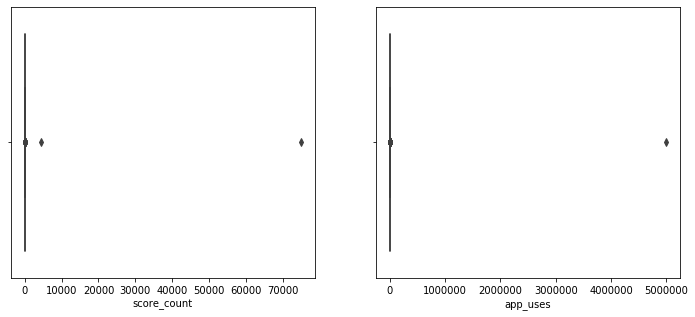

In [14]:
# Boxplot to visualise potential outliers
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.boxplot(x=au_df.score_count, data=au_df,  ax=ax[0])
sns.boxplot(x=au_df.app_uses, data=au_df,  ax=ax[1])
plt.show()

In [15]:
# score_count
sc = sorted([*au_df.score_count], reverse=True)
print(f"The top 10 values in score_count:\n\t{sc[:10]}")
print(f"The bottom 10 values in score_count:\n\t{sc[-10:]}")

The top 10 values in score_count:
	[75000.0, 4500.0, 140.0, 130.0, 125.0, 125.0, 120.0, 105.0, 100.0, 100.0]
The bottom 10 values in score_count:
	[45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, -45.0]


Based on the sorted list for score count, there are two samples have values over 1,000 and one sample has a value that is negative. It seems they are outliers in the dataset and one of the possible causes is human error when inputing the data. Although further investigation is needed generally, for the purpose of this test, we will remove related rows.

In [16]:
# app_uses
au = sorted([*au_df.app_uses], reverse=True)
print(f"The top 10 values in app_uses:\n\t{au[:10]}")
print(f"The bottom 10 values in app_uses:\n\t{au[-10:]}")

The top 10 values in app_uses:
	[4999995, 465, 260, 255, 235, 215, 200, 195, 175, 170]
The bottom 10 values in app_uses:
	[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Based on the sorted list for app users, there is one sample has a value of 4,999,995. Similiarly, although further investigation is needed generally, for the purpose of this test, we will remove related rows.

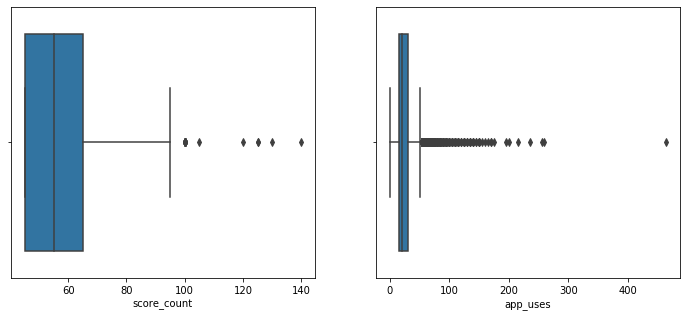

In [17]:
# Remove outliers in score_count and app_uses
au_df = au_df[(au_df.score_count < 1000) & (au_df.score_count >= 0) & (au_df.app_uses < 800)].copy().reset_index(drop=True)

# Re-plot the box plot for the two variables to see the effect of removing the outliers
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.boxplot(x=au_df.score_count, data=au_df,  ax=ax[0])
sns.boxplot(x=au_df.app_uses, data=au_df,  ax=ax[1])
plt.show()

In [18]:
# Summary statistics for numerical variables (AU subset) - after removing outliers
au_df[num_var].describe().T.round(4)

,count,mean,std,min,25%,50%,75%,max
boxes_taken,8494.0,71.7724,64.2273,15.0,25.0,45.0,100.0000,265.0
score_count,8494.0,56.3592,11.8277,45.0,45.0,55.0,65.0000,140.0
score_freq,8494.0,0.0995,0.2036,0.0,0.0,0.0,0.0833,1.0
app_uses,8494.0,25.2007,19.4697,0.0,15.0,20.0,30.0000,465.0


In [19]:
# Summary statistics for categorical variables (AU subset)
au_df[cat_var].describe().T

,count,unique,top,freq
activation_channel,8494,7,C,3305
state,8494,8,NSW,2224
app_store,8494,2,app2,6646
country,8494,1,AU,8494


In [20]:
# A more detailed view on each categorical variable
for i in cat_var:
    print(au_df[[i]].value_counts())
    print("=========================")

activation_channel
C                     3305
F                     1442
A                     1401
D                      868
B                      739
E                      438
G                      301
dtype: int64
state             
NSW                   2224
QLD                   2182
VIC                   1891
WA                    1271
TAS                    522
NT                     213
SA                     186
To be investigated       5
dtype: int64
app_store
app2         6646
app1         1848
dtype: int64
country
AU         8494
dtype: int64


## Task 3 - Product Count Distribution 

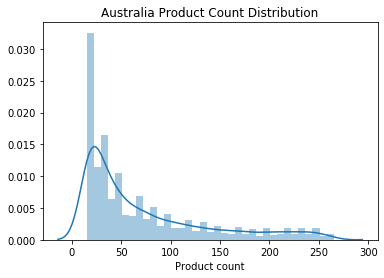

In [21]:
# Distribution/Histogram plot for product count
sns.distplot(au_df.boxes_taken, kde=True)
plt.xlabel("Product count")
plt.title("Australia Product Count Distribution")
plt.show()

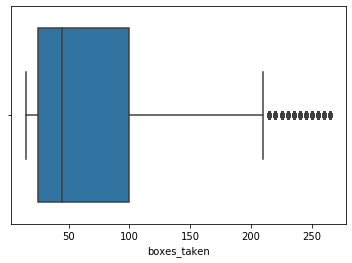

In [22]:
# Box plot for boxes taken
sns.boxplot(x=au_df.boxes_taken, data=au_df)
plt.show()

In [23]:
# Skewness
print(f"The skewness is {round(stats.skew(au_df.boxes_taken),4)}")

The skewness is 1.3308


Based on the plots above, the product count in Australia is approximately following an exponential distrubution, and it is positively skewed.

## Task 4 - Exploratory Data Analysis

To study the impact of various continuous numerical variables on the product count, we can use the correlation matrix which indicates the correlation between the variables.

In addition, we need to perform a hypothesis test on the two sample mean in order to conclude whehter there is a statistical significant difference in the average product count between the two app user groups.

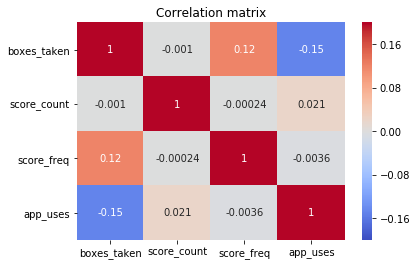

In [24]:
#Correlation Matrix
sns.heatmap(au_df[num_var].corr(), vmin=-0.2, vmax=0.2, annot=True, cmap="coolwarm")
plt.title('Correlation matrix')
plt.show()

To understand which continuous variable has the highest impact on product count, we need to study their correlation. Based on the correlation matrix above, "app_uses" has the highest correlation with "boxes taken", which is -0.15. It indicates a negative correlation between boxes_taken and app_uses.

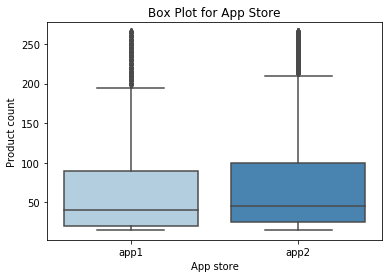

In [25]:
# Using box plot to analyse categorical variable "app_store"
sns.boxplot(x='app_store', y='boxes_taken', data=au_df, palette='Blues', order=['app1', 'app2'])
plt.xlabel("App store")
plt.ylabel("Product count")
plt.title("Box Plot for App Store")
plt.show()

To understand whether customers with a specific app store take more products or not, we need to perform a hypothesis test

Notation:
- $\mu_1$: the mean of product count for app store 1
- $\mu_2$: the mean of product count for app store 2

$H_0: \mu_1 \geq \mu_2$

$H_1: \mu_1 < \mu_2$

The first thing is to test whether the two groups have equal variance using F-test.

In [26]:
# Product count from app store 1
app_1 = au_df[au_df.app_store =='app1']['boxes_taken'].reset_index(drop=True)
# Product count from app store 2
app_2 = au_df[au_df.app_store =='app2']['boxes_taken'].reset_index(drop=True)

# First is to test whehter the two groups have equal variances
print(f"Variance for app store 1: {round(np.var(app_1), 4)}")
print(f"Variance for app store 2: {round(np.var(app_2), 4)}")
print(f"Variance ratio (app2/app1) is: {round(np.var(app_2)/np.var(app_1), 4)}")

# F-test whether the two groups have equal variance
alpha = 0.05 #signigicant level
F = np.var(app_2)/np.var(app_1)
p_value = stats.f.cdf(F, len(app_1)-1, len(app_2)-1)
print(f'The p-value for the F-test is {round(p_value, 4)}')
if p_value < alpha:
    print("Reject the null hypothesis, and Var(app1) not equal to Var(app2)")
else:
    print("Accept the null hypothesis, and Var(app1) is equal to Var(app2)")

Variance for app store 1: 3778.8227
Variance for app store 2: 4212.0008
Variance ratio (app2/app1) is: 1.1146
The p-value for the F-test is 0.9984
Accept the null hypothesis, and Var(app1) is equal to Var(app2)


One of the assumptions for two sampl equal variance test is the variables are normally distrubuted. Becasue the sample size in the two groups are large enough, we can say that central limit theorem holds and we can assume that the variabels normal distrubuted.

In [27]:
# Sample size of the 2 groups
print(f"There are {len(app_1)} samples in app1 and {len(app_2)} samples in app2")

There are 1848 samples in app1 and 6646 samples in app2


In [28]:
# Use the stats package to perform T-test for the means of two samples
t_test = stats.ttest_ind(a=app_1, b=app_2, equal_var=True)
print(t_test)

alpha = 0.05
if np.mean(app_1) < np.mean(app_2):
    pval = t_test.pvalue/2.
else:
    pval = 1 - t_test.pvalue/2

print(f'The p-value is {round(pval,4)}')

if pval < alpha:
    print("Reject the null hypothesis, and mean(app1) lesser than mean(app2)")
else:
    print("Accept the null hypothesis, and mean(app1) is greater than or equal to mean(app2)")

Ttest_indResult(statistic=-3.774193760105849, pvalue=0.000161619036392275)
The p-value is 0.0001
Reject the null hypothesis, and mean(app1) lesser than mean(app2)


Setting the significant level at 0.05, the p-value from the one-tail two-sample equal variance test is smaller than the significant level. Therefore, we reject null hypothesis and conclude that average product counts from app1 user groups is statistically significanly smaller than the app2 user groups.

## Task 5 - Channel Analysis

Assumption: variable 'app_uses' measures the time each custoemr spent on the app (measured in hours)

To study which sales channel is the most efficient, we need to create a metrics to measure efficiency, which is

$\frac{Number \quad of \quad boxes \quad ordered}{Total \quad time \quad spent}$

In [29]:
# Group the dataset by channel and app store and using sum as aggregation
ch_df = au_df.groupby(['activation_channel', 'app_store']).sum()[['boxes_taken', 'app_uses']]
# Caclulate 'efficiency' for each channel, app store combination
ch_df['efficiency'] = ch_df['boxes_taken']/ch_df['app_uses']
ch_df

boxes_taken  app_uses  efficiency
activation_channel app_store                                   
A                  app1             22865      7855    2.910885
                   app2             76540     29325    2.610060
B                  app1              8925      2925    3.051282
                   app2             50370     19475    2.586393
C                  app1             42345     16845    2.513802
                   app2            173315     69950    2.477698
D                  app1             13105      4965    2.639476
                   app2             45835     15315    2.992817
E                  app1              5710      1740    3.281609
                   app2             28320      8305    3.409994
F                  app1             24765      6115    4.049877
                   app2             93460     24775    3.772351
G                  app1              5710      1375    4.152727
                   app2             18370      5090    3.609037

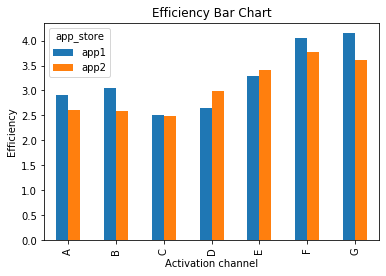

In [30]:
ch_df['efficiency'].unstack().plot(kind='bar')
plt.xlabel('Activation channel')
plt.ylabel('Efficiency')
plt.title('Efficiency Bar Chart')
plt.show()

Overall, we can see that Channel G, App1 is the most efficient channel in Australia which is abour 4.15 boxes per hour.

## Task 6 - Region Analysis

To study which state has the longest total app hours and its total product count, we can use the groupby function in Pandas and use sum and mean as the aggregation function.

Notes: I used the average app use hours per customer for each state to measure which region stats the longest with the company. The reason is that different states might be different in the population scale, and simply looking at the total number of app hours could be biased towards the states that are normally bigger.

In [31]:
# Groupby region
cst_df = au_df.groupby('state').agg({'boxes_taken': np.sum, 'app_uses': [np.mean, np.sum], 'customer_id': 'count'})
cst_df.columns = ['_'.join(i) for i in cst_df.columns]
cst_df.reset_index(drop=False, inplace=True)
cst_df.sort_values(by='app_uses_mean', ascending=False, inplace=True)
cst_df

,state,boxes_taken_sum,app_uses_mean,app_uses_sum,customer_id_count
4,TAS,37720,26.954023,14070,522
2,QLD,148055,26.239688,57255,2182
1,NT,17185,25.868545,5510,213
7,WA,86225,25.177026,32000,1271
5,To be investigated,535,25.000000,125,5
6,VIC,134250,24.616605,46550,1891
0,NSW,170970,24.372752,54205,2224
3,SA,14695,23.333333,4340,186


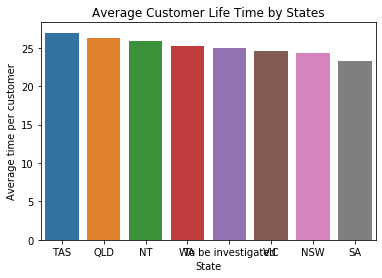

In [32]:
sns.barplot(data=cst_df, x='state', y='app_uses_mean')
plt.xlabel('State')
plt.ylabel('Average time per customer')
plt.title('Average Customer Life Time by States')
plt.show()

We can see that customers from state S tend stay the longest with the company. On average each customer spends approximately 27 hours on the app. In total, there have been a total number of 37,720 boxes sent to state L.

However, state L has a very similar average app use hours compared to state S (only slightly smaller). On average, each customer spends 26 hours on the app. Nevertheless, the totoal app hours is 57,255 and the total amount of boxes shipped is 148,055. State L is relatively large in scale in both the customer base, total app hours and total boxes ordered.

Overall, I would conclude that state L has a more significant business position to the company compare to S.

## Executive Summary



In this analysis, our main object is to investigate the product puchase data from 8,489 customer and generate insights that are related to the product sales. The analysis reveals the following key insights which could be valuable to the business owner:

    1. Product sales follow an exponential distribution with a heavy right tail, meaning most of the product sales are between 0 and 50 in volume with a few customers purchasing extremely large amount.
    
    2. App uses and score frequency could potentially be good indicators for product sales as they are negatively and positvely correlated to the product count.

    3. Score count is basically uncorrelated with the product sales, indicating that there is no linear relationship between the two variables.
    
    4. Depends on the app that a customer use, the average product sales for app1 user groups is a statistically significantly smaller than the app2 user groups.
    
    5. Selling channel G using app version 1 has the highest efficiency comparing to the other 13 sell channels.
    
    6. Although State S has the highest average app use hours in number, State L plays a more important role to the buisness not only because it has the second highest average app use per customer, but aslo it is very large in the total numebr of customer, total number of products ordered and total number of app use hours.